In [1]:

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import numpy as np

import scipy as sp
from sklearn import datasets, linear_model


%matplotlib inline

### Correlation

* Two variables $X$ and $Y$ are correlated if knowledge of one helps better predict the other

* In statistics, the strength of the relationship between the relative movements of two variables is often conveyed using the correlation coefficient.
  *  The values range between -1.0 (negatively correlated) and 1.0 (positively correlated) 

 


### Correlation -- Cont'd

![](https://www.dropbox.com/s/myshvo6b8qhcm6n/correlation_examples.png?dl=1)

### Examples of Correlations

  * Weight is correlated with height (relatively strong positive correlation)
  
  * The number of tourist in a Waikiki is correlated with the total sales at ABC stores (reasonably strong positive correlation)
  * IQ and time to required to solve simple logic problems (reasonably strong negative correlation)
  * The number of daily cigarettes smoked and the number of years lived (reasonably strong negative correlation)
  
  * The number of video games played and violent behavior score (Extremely weak positive correlation)
    ![Violent video game engagement is not associated with adolescents' aggressive behaviour: evidence from a registered report)?](https://royalsocietypublishing.org/doi/10.1098/rsos.171474)


### Linear Correlations

* Linear correlation ranges from -1 (_anti-correlated_) to 1  (_fully_ _correlated_) through 0 (_uncorrelated_)
* The most popular methods for computing linear correlation are:
  * Pearson Correlation coefficient ($R$)
  * Spearman Rank Correlation $(\rho)$

* Other method can capture non linear releationships

In [2]:
X = [1,2,3,4,5,6,7,8,9,10]
Y = [11,12,13,14,15,16,17,18,19,20]



### Positive Correlation 

* As $X$ increases, $Y$ increases 

<img src="https://www.dropbox.com/s/k37c1q5r6lweo46/correlation_distance_mean.png?dl=1" alt="drawing" style="width:500px;"/>

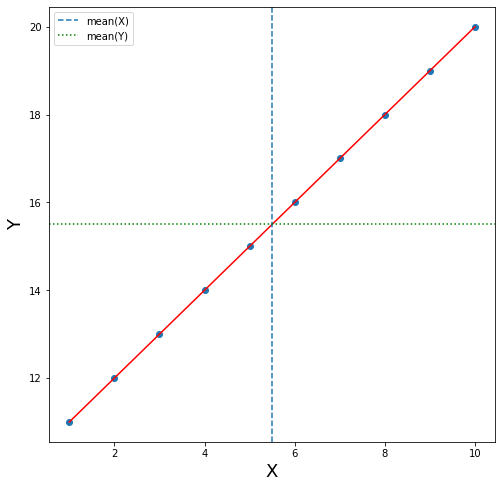

In [6]:
plt.figure(figsize=(8,8))
data = pd.DataFrame({"X":X, "Y":Y})
plt.scatter(X, Y)
plt.plot(X,Y, color ='r')
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", fontsize=18)
plt.axvline(data["X"].mean(), linestyle='--', label="mean(X)")
plt.axhline(data["Y"].mean(), linestyle=':', label="mean(Y)", color='green')

plt.legend()

In [7]:
X = [1,2,3,4,5,6,7,8,9,10]
Y = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
data = pd.DataFrame({"X": X, "Y": Y})
data


,X,Y
0,1,10
1,2,9
2,3,8
3,4,7
4,5,6
5,6,5
6,7,4
7,8,3
8,9,2
9,10,1


### Negative Correlation

* As $X$ descrases, $Y$ also descrases

<img src="https://www.dropbox.com/s/swz04h533lfl2fg/neg_correlation.png?dl=1" alt="drawing" style="width:500px;"/>

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X, Y)
plt.plot(X,Y, color ='r')

plt.xlabel("X", fontsize=18)
plt.ylabel("Y", fontsize=18)

plt.axvline(data["X"].mean(), linestyle='--', label="mean(X)")
plt.axhline(data["Y"].mean(), linestyle=':', label="mean(Y)", color='green')



In [ ]:
X = [1,2,3,4,5,6,7,8,9]
Y = [3,8,2,5,3,6,4,1,7]

data = pd.DataFrame({"X": X, "Y": Y})
data

### Lack of Correlation

* As $X$ increases, $Y$ sometimes increases and sometimes decreases

<img src="https://www.dropbox.com/s/t4xzs88xkvs2m8z/no_corr_distance.png?dl=1" alt="drawing" style="width:600px;"/>

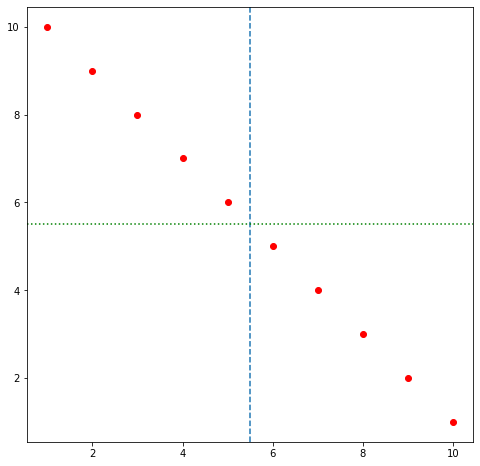

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X,Y, color ='r')
plt.axvline(data["X"].mean(), linestyle='--', label="mean(X)")
plt.axhline(data["Y"].mean(), linestyle=':', label="mean(Y)", color='green')

### Computing The Correlation Coefficient

* If the correlation is positive: when X's distance from it mean increases, Y's distance from its mean increases as well 
* If the correlation is negative: when X's distance from its mean increases, Y's distance from its mean decreases or vice-versa 
* In the absence of correlation the contributions of $X_i$ and $Y_i$ cancel out. Therefore, the correlation tends toward 0
 Ex.
 

### Computing The Correlation Coefficient - Cont'd

* Pearson Correlation Coefficient

$$
r = \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})     }}{\sqrt{\sum_{i-1}^n{(X_i-\overline{X})}} \sqrt{\sum_{i-1}^n{(Y_i-\overline{Y})}} }
$$


* Pearson correlation measures how **in sync** are two variables $X$ and $Y$

* For two variable to be corrected we need: 

   - If a value from `X` is much bigger than its means, then we want the other one to be equivalently larger than it's mean
   - If a value from `X` is much smaller than its means, then we want the other one to be equivalently smaller than it's mean 


### $R^2$ and the Explained Variance

- $R^2$ is  the square of the correlation coefficient

- The interpretation of $R^2$ is different from that of $R$

* Example:
-  We will study the correlation between number of hotel rooms sold in Waikiki and average daily sales at ABC Stores also in Waikiki



In [3]:
import pandas as pd 
daily_sales = pd.read_table("data/room_abc_sales.tsv", header=None)

daily_sales.head()

,0,1
0,180,66649.07
1,181,71557.20
2,182,104553.23
3,183,146851.52
4,184,84260.95


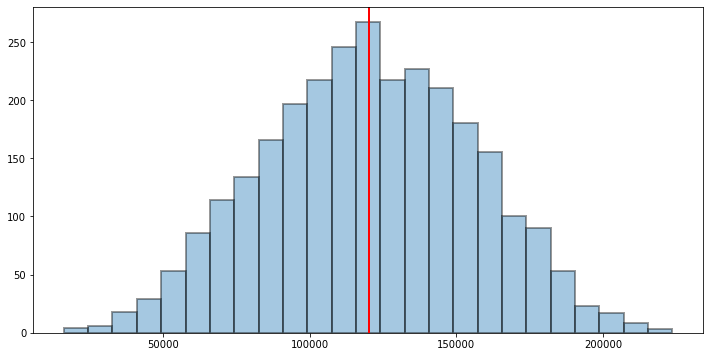

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))

_ = plt.hist(daily_sales[1], bins=25, edgecolor="k", linewidth=2, alpha=0.4)
plt.axvline(daily_sales[1].mean(), color ='r', linewidth=2)

### Regression Line

* In the presence of rooms sold, the total number of  value can be reprented by the regression line
  * The line which best fits the data
    * Has the minimum distance to all the points 

* The regresison line is the model we believe explains the data

 <img src="https://www.dropbox.com/s/wm1qc7604hmb4zm/reg.png?dl=1" alt="drawing" style="width:400px;"/>

### Question

* Here we can model the data using a simple linear regression to predict the sales based on the number of rooms

* In the absence of any other information about sales, what is your prediction for next Tuesday's sales?
  * Approximate number
  * We don't have access to the number of rooms that are predicted to be sold in Waikiki


### Sales Distribution

- Sales are Normal with a mean ~ $120,227

* In the absence of any other information about the data, the mean is a good predictor of total daily sales
  * A good predictor compared to what?
    * Compared to prediction in the presence of other data. for Example: 
      * Number of rooms sold in hotels around ABC sores 
      * Whether there are any special events
      * Whether it's a holiday. etc...
      * i.e., whether we have a correlated variable does better than average.

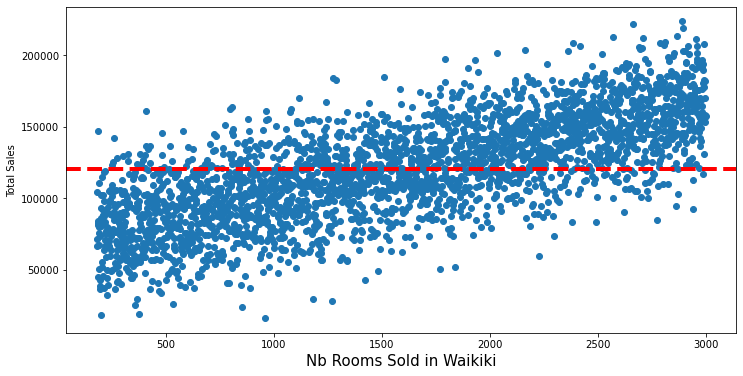

In [12]:
plt.figure(figsize=(12,6))

plt.scatter(daily_sales[0],daily_sales[1])
plt.xlabel("Nb Rooms Sold in Waikiki", fontsize=15)
plt.ylabel("Total Sales")
plt.axhline(np.mean(daily_sales[1]), color= 'r', linestyle='--', linewidth=4)


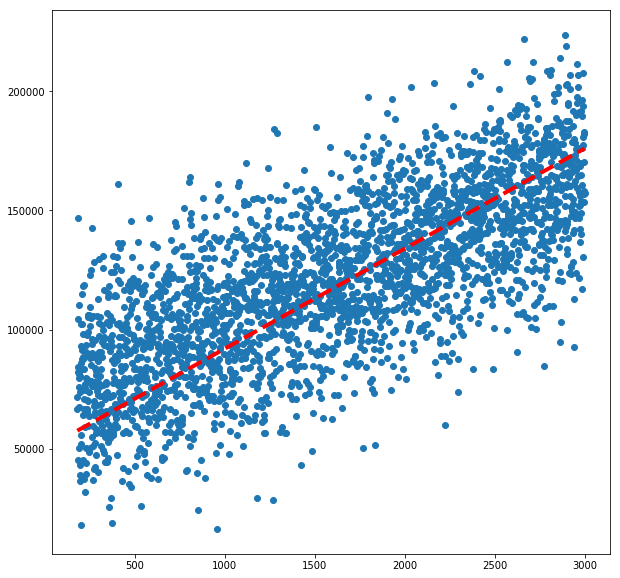

In [62]:
plt.figure(figsize=(10,10))

plt.scatter(daily_sales[0],daily_sales[1])

plt.plot(daily_sales[0], 50000 + 42* daily_sales[0], color='r', linewidth=4, linestyle='--')


### The Regression Residuals

* Recall that the risidual is simply the differnece between an observed value and an estimated value

* The error between the observed value and the predicted value (line)

<img src="https://www.dropbox.com/s/9au96t92s10dkb3/residuals.png?dl=1" alt="drawing" style="width:500px;"/>


### Minimizing the Residuals

* Naturally, when predicting a quantity of interest, we want to find the method that minimizes the residuals

 * The total sum of all the residuals is the smallest possible
 
 * The model or red line above, should match as closely as possible on the points so that the residuals are small 

* What if we used the mean for our predictions?

### Mean vs. Regression Residuals

<img src="https://www.dropbox.com/s/viw9io2y154pgkt/mean_vs_reg_residuals.png?dl=1" alt="drawing" style="width:1000px;"/>



### Mean vs. Regression Residuals - Cont'd

- The variance around the mean is just the natural variance in you data.

- The regression line is the line that best fits the data, i.e., minimizes the total sum of residuals. 

- Visually, we can confirm that the red line fits the data better than the mean (black line).

### Mean vs. Regression Residuals - Cont'd

* $R^2$ quantifies the difference that the best fitting line (the one that minimizes the residuals) and the mean line

 
<img src="https://www.dropbox.com/s/2y75vjsya5xtkzt/mean_vs_reg_residuals_2.png?dl=1" alt="drawing" style="width:1000px;"/>

* Difference between the variance around mean line and the variance around the red line, normalized by the variance around the mean line

### Mean vs. Regression Residuals - Cont'd

* We normalize by $\sigma^2_{mean\_line}$ so that the $R^2$ is constrained to the interval [0,1]

  * $\sigma^2_{red\_line}$ will never be greater than $\sigma^2_{mean\_line}$ 


In [168]:
from scipy import stats

print(stats.pearsonr(daily_sales[0], daily_sales[1]))

print(stats.pearsonr(daily_sales[0], daily_sales[1])[0] ** 2)


(0.7262702431699776, 0.0)
0.5274684661141783


In [69]:

var_mean = np.sum((daily_sales[1] - np.mean(daily_sales[1]))**2)

print(var_mean)


3559841164665.26


In [70]:
predicted_val  = 69843.88 + 31.69 * np.array(daily_sales[0])
var_red_line = np.sum((daily_sales[1] - predicted_val)**2)
print(var_red_line)

1682137768328.9448


In [71]:
(var_mean - var_red_line) / var_mean


0.5274683081296634

### Variance Explained

* The data show a strong correlation between number of rooms sold and daily sales

  * $R = 0.72$ then $R^2 =R * R = 0.527$ 


* Regression line explains approaximate %53 of the variance in the data
 * We have understood 53% of what drives the sales at the ABC store
   
* In the abscene of better alternative variables, the number of rooms sold in Waikiki is a good predictor of total sales in Waikiki's ABC store.
        * What about the remaining variance not explained by $R^2$? 
        
* It certainly is better than just taking the mean as a predictor
    

### Significance and the variance explained

* If the variance explained ($R^2$) is low, then $X$ is most like not a good predictor of $Y$ in the context of a linear model.
  * This does not say anything about non-linear models
  
  
*  In real-life, you are likely to have other `explanatory variables` that could help you to account for a more considerable variance
   * Leads to better models with less total residuals
   
* For instance, for the ABC sales data, you may have access to weather data
    - If it's raining and cold, tourists are less likely to go shopping so including the effect of rain, in addition to room occupancy, can produce a more accurate model for ABC sales that the room occupancy alone.
 
* More on multiple linear regressions later

### Correlation versus Causation

* Correlation does not mean causation.

* The number of police active in a precinct  correlated strongly with the local crime rate
   * Police do not cause crime

### Adjust R Square and Multiple Testing Correction
* We need to compensate for additional independent variables
  R is monotonically increasing
* We need to correct for the fact that when conducting a large number of correlation tests, some will be correlated purely by chance